/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


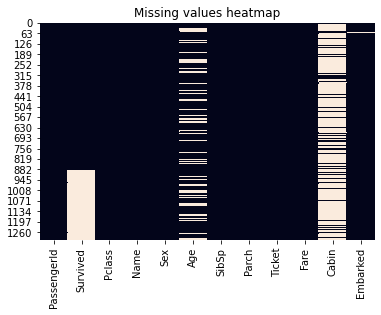

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
trd = pd.read_csv('../input/titanic/train.csv')
tsd = pd.read_csv('../input/titanic/test.csv')
td = pd.concat([trd, tsd], ignore_index=True, sort = False)

td.isnull().sum()
sns.heatmap(td.isnull(), cbar = False).set_title("Missing values heatmap")
td.nunique()
td['Family'] = td.Parch + td.SibSp
td['Is_Alone'] = td.Family == 0
td['Fare_Category'] = pd.cut(td['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid', 'High_Mid','High'])
td.Embarked.fillna(td.Embarked.mode()[0], inplace = True)
td.Cabin = td.Cabin.fillna('NA')
td['Salutation'] = td.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
grp = td.groupby(['Sex', 'Pclass'])
grp.Age.apply(lambda x: x.fillna(x.median()))
td.Age.fillna(td.Age.median, inplace = True)
td['Sex'] = LabelEncoder().fit_transform(td['Sex'])
pd.get_dummies(td.Embarked, prefix="Emb", drop_first = True)
td.drop(['Pclass', 'Fare','Cabin', 'Fare_Category','Name','Salutation', 'Ticket','Embarked', 'SibSp', 'Parch', 'Age'], axis=1, inplace=True)
# Data to be predicted
X_to_be_predicted = td[td.Survived.isnull()]
X_to_be_predicted = X_to_be_predicted.drop(['Survived'], axis = 1)
# X_to_be_predicted[X_to_be_predicted.Age.isnull()]
# X_to_be_predicted.dropna(inplace = True) # 417 x 27
#Training data
train_data = td
train_data = train_data.dropna()
feature_train = train_data['Survived']
label_train = train_data.drop(['Survived'], axis = 1)
##Gaussian
clf = GaussianNB()
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)
clf.fit(x_train, np.ravel(y_train))
print("NB Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")
result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for NB', y=1.05, size=15)


